In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from get_aq_data import get_all_sensor_data, get_flo_data, ID_to_name

In [4]:
data, hourly_mean, daily_mean = get_all_sensor_data(from_date='2019-01-01')

________________________________________________________________________________
[Memory] Calling get_aq_data.get_sensor_data...
get_sensor_data('aq-deployment_nesta-9', from_date='2019-01-01', cols=['pm25'])
__________________________________________________get_sensor_data - 0.9s, 0.0min


In [5]:
import sys
sys.path.append('/Users/robin/code/PyAURN')

In [10]:
import importAURN

SOUT = importAURN.importAURN('SOUT', range(2018, 2020))

AURN = SOUT['2019-10-01':]['PM2.5']

In [11]:
all_site_daily_mean = daily_mean.mean(axis=1)
all_site_daily_std = daily_mean.std(axis=1)

In [12]:
AURN_daily_mean = AURN.resample('1D').mean()

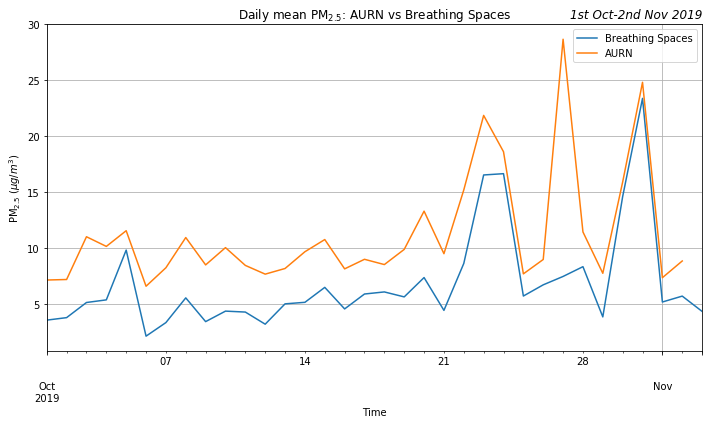

In [15]:
ax = all_site_daily_mean['2019-10-01':].plot(figsize=(10, 6), label='Breathing Spaces')
AURN_daily_mean['2019-10-01':].plot(ax=ax, label="AURN")
plt.legend()
plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel('$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.title('Daily mean $\mathrm{PM}_{2.5}$: AURN vs Breathing Spaces')
plt.title('1st Oct-2nd Nov 2019', loc='right', fontstyle='italic')
plt.tight_layout()
plt.savefig('graphs/AURN_Comparison_October_AzureData.png', dpi=300)

In [ ]:
ax = all_site_daily_mean.plot(figsize=(10, 6), label='Breathing Spaces')
plt.fill_between(all_site_daily_mean.index, all_site_daily_mean - all_site_daily_std, all_site_daily_mean + all_site_daily_std, alpha=0.3)
AURN_daily_mean.plot(ax=ax, label="AURN")
plt.xlim('2019-09-03', '2019-10-01')
plt.ylim(0,20)
plt.legend()
plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel('$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.title('Daily mean $\mathrm{PM}_{2.5}$: AURN vs Breathing Spaces')
plt.title('3rd Sept-1st Oct 2019', loc='right', fontstyle='italic')
plt.tight_layout()
#plt.savefig('graphs/AURN_Comparison_Zoomed_WithUncertainty.png', dpi=300)

In [ ]:
ax = daily_mean.rename(columns=ID_to_name).plot(figsize=(10, 6), label='Breathing Spaces', color='gray', alpha=0.7)
AURN_daily_mean.plot(ax=ax, label="AURN", color='r')
plt.xlim('2019-09-03', '2019-10-01')
plt.ylim(0,20)
plt.legend(ncol=3)
plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel('$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.title('Daily mean $\mathrm{PM}_{2.5}$: AURN vs Breathing Spaces')
plt.title('3rd Sept-1st Oct 2019', loc='right', fontstyle='italic')
plt.tight_layout()
plt.savefig('graphs/AURN_Comparison_September_AzureData_AllSensors.png', dpi=300)

In [ ]:
AURN_daily_mean.index = AURN_daily_mean.index.date

In [ ]:
combined = pd.DataFrame({'AURN': AURN_daily_mean, 'BreathingSpaces': all_site_daily_mean})

In [ ]:
combined.index = pd.DatetimeIndex(combined.index)

In [ ]:
combined.groupby(combined.index.month).apply(lambda x: x.corr())